In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = '../dataset/r_dataisbeautiful_posts.csv'
data = pd.read_csv(DATA_PATH)

/tmp/ipykernel_6800/1079975619.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(DATA_PATH)


In [3]:
data.iloc[0]['id']

'it7yz2'

In [4]:
data.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,it7yz2,[OC] The World’s Forests Mapped,1,vividmaps,NaN,NaN,0.0,[],1600173678,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
1,it7uig,[OC] Airbnb presence mapped in Barcelona (BCN)...,1,JonnieNeptune,OC: 2,NaN,0.0,[],1600173208,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
2,it7t4z,A marketplace for open streaming data sources,1,DangerMouse289,NaN,automod_filtered,0.0,[],1600173075,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
3,it7jfq,[OC] Black Owner-Occupied Housing,1,SocialExplorerInc,OC: 17,NaN,0.0,[],1600172010,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
4,it7a3r,[OC] My monthly average steps in 2020. Quarant...,1,ahmedgelemli,OC: 2,NaN,0.0,[],1600171002,https://www.reddit.com/r/dataisbeautiful/comme...,0,False


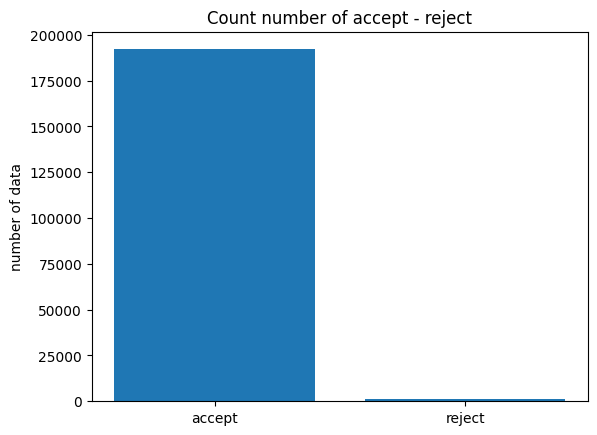

In [5]:
# Data imbalance
fig, ax = plt.subplots()
total_accept, total_reject = data['over_18'].value_counts()

ax.bar(['accept', 'reject'], [total_accept, total_reject])
ax.set_ylabel('number of data')
ax.set_title('Count number of accept - reject')
plt.show()

In [8]:
#split train_val
ids = data[['id', 'over_18']]

In [10]:
ids['over_18'].value_counts()

False    192094
True        997
Name: over_18, dtype: int64

In [12]:
N_VAL = 200

In [48]:
val_list = [data[data['over_18'] == False].reset_index().loc[:N_VAL], data[data['over_18'] == True].reset_index().loc[:N_VAL]]
train_list = [data[data['over_18'] == False].reset_index().loc[N_VAL:], data[data['over_18'] == True].reset_index().loc[N_VAL:]]

In [49]:
val_df = pd.concat(val_list)
train_df = pd.concat(train_list)

In [50]:
train_df['over_18'].value_counts()

False    191894
True        797
Name: over_18, dtype: int64

In [43]:
val_df['over_18'].value_counts()

False    201
True     201
Name: over_18, dtype: int64

In [51]:
val_df.to_csv('../dataset/val.csv')
train_df.to_csv('../dataset/train.csv')

In [53]:
val_df[val_df['over_18'] == True]

,index,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,75,isp1c9,FonePaw iPhone Data Recovery 7.8.0 Crack Regis...,1,richahashmi128,NaN,reddit,0.0,[],1600102985,https://www.reddit.com/r/dataisbeautiful/comme...,0,True
1,107,isjfs2,Sluts,0,International-Lime84,NaN,moderator,0.0,[],1600084577,https://www.reddit.com/r/dataisbeautiful/comme...,3,True
2,195,iry7ro,Data is beautiful,1,Environmental_Pay_92,NaN,moderator,0.0,[],1600003467,https://www.reddit.com/r/dataisbeautiful/comme...,0,True
3,324,ir6x3d,"I entered a horrible, racist phrase into the G...",1,OhSoYouWannaPlayHuh,NaN,moderator,0.0,[],1599888829,https://www.reddit.com/r/dataisbeautiful/comme...,2,True
4,382,iqocgw,Stellar Data Recovery Professional Crack 10.0....,1,licensecrack,NaN,reddit,0.0,[],1599822172,https://www.reddit.com/r/dataisbeautiful/comme...,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,35861,ebitb8,Averaged aesthetics: an average of 53631 NSFW ...,1,SlothFacts101,NaN,moderator,0.0,[],1576520149,https://www.reddit.com/r/dataisbeautiful/comme...,2,True
197,35889,ebewaj,[OC] [NSFW] User rating Vs views for my storie...,1,Migratory_Swallow,NaN,NaN,0.0,[],1576501533,https://www.reddit.com/r/dataisbeautiful/comme...,3,True
198,35981,eaxxdm,Brands With Best-Selling Video Game Consoles 1...,1,su9skeng,NaN,NaN,0.0,[],1576409193,https://www.reddit.com/r/dataisbeautiful/comme...,1,True
199,36107,ead11h,Average values for erect and flaccid penis len...,1,hd189,OC: 1,NaN,0.0,[],1576285776,https://www.reddit.com/r/dataisbeautiful/comme...,58,True
